In [133]:
import pandas as pd
import seaborn as sns; sns.set();
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%pwd


'/home/localadmin/Documents/DataSci'

In [134]:
#opening the data set and storing in Pandas dataframe "df"
f = open('/home/localadmin/business.csv','r')
df = pd.read_csv(f);
df.iloc[:,6:12]

,Impact: Capital Investments,Impact: Created New Jobs,Impact: Revenue Increase,Impact: Started Business,Company's Total employees,"Company's Gross Revenue, $"
0,0.0,0.0,0.0,Not applicable: Already in Business,1.0,60000.0
1,0.0,0.0,0.0,Yes,1.0,75000.0
2,0.0,0.0,0.0,Not applicable: Already in Business,3.0,150000.0
3,0.0,0.0,0.0,No,0.0,0.0
4,0.0,0.0,0.0,Not applicable: Already in Business,12.0,1200000.0
5,0.0,0.0,0.0,Not applicable: Already in Business,17.0,150000.0
6,0.0,2.0,500000.0,Not applicable: Already in Business,9.0,1695169.0
7,652900.0,27.0,0.0,Not applicable: Already in Business,35.0,500000.0
8,0.0,0.0,0.0,Not applicable: Already in Business,1.0,60000.0
9,0.0,0.0,0.0,Not applicable: Already in Business,6.0,150000.0


In [135]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X.iloc[:,0].values,y.iloc[:,0].values,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X,y.values.ravel())
    
    xx,yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap=cmap, clim=(y.min(), y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)
    #error happening on C

In [136]:
#using PCA dimenstionality reduction on Captial investments, new jobs, revenue to generalize "success"
pca = PCA(n_components=1)
pca.fit(df.iloc[:,6:9])
impact_pca = pd.DataFrame(pca.transform(df.iloc[:,6:9].values))
impact_pca
codes = pd.DataFrame(df.iloc[:,12].values)
#impact_pca
codes.values[:,0]


array(['56', '54', '11', ..., '72', '31', '45'], dtype=object)

In [148]:
model = RandomForestClassifier(n_estimators=100, random_state=0);


ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 2 

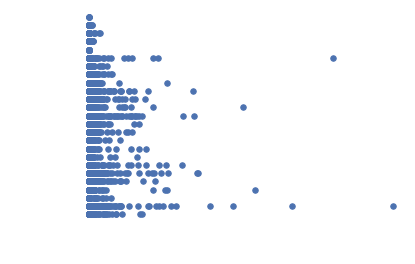

In [150]:
visualize_classifier(model,impact_pca,codes)